In [3]:
import math
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

### Hyperparameters Tuning

In [4]:
df = pd.read_csv('data/train_features.csv')
y = df.pop('popularity').values
X = df.values
X.shape, y.shape

((129172, 15), (129172,))

1.- Linear Regression

In [3]:
param_grid = {'n_jobs'         : [None, 2, -1],
              'normalize'      : [True, False],
              'copy_X'         : [True, False]}

model1    = LinearRegression()
model1_gs = GridSearchCV(model1, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
model1_gs = model1_gs.fit(X, y)

In [17]:
tmp = pd.DataFrame(model1_gs.cv_results_)
tmp = tmp[tmp['rank_test_score'] == 1]

tmp = tmp.rename(columns={'rank_test_score' : 'rank',
                          'mean_test_score' : 'NRMSE',
                          'param_n_jobs' : 'p_n_jobs',
                          'param_normalize' : 'p_normalize',
                          'param_copy_X' : 'p_copy_X'})
tmp [['rank', 'NRMSE', 'p_n_jobs', 'p_normalize','p_copy_X' ]].head()

,rank,NRMSE,p_n_jobs,p_normalize,p_copy_X
1,1,-8.988694,None,False,True
3,1,-8.988694,2,False,True
5,1,-8.988694,-1,False,True
7,1,-8.988694,None,False,False
9,1,-8.988694,2,False,False


2.- BaggingRegressor + DecisionTreeRegressor

In [8]:
param_grid = {'random_state'              : [None, 0, 42],
              'base_estimator__max_depth' : [None, 8, 9, 10, 11, 12,15, 20],
              'base_estimator__criterion' : ['mse', 'friedman_mse']
             }

model21    = BaggingRegressor(DecisionTreeRegressor())
model21_gs = GridSearchCV(model21, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
model21_gs = model21_gs.fit(X, y)

In [14]:
tmp = pd.DataFrame(model21_gs.cv_results_)
tmp = tmp.sort_values(by=['rank_test_score']).reset_index(drop='index')

tmp = tmp.rename(columns={'rank_test_score' : 'rank',
                          'mean_test_score' : 'NRMSE',
                          'param_random_state' : 'p_random_state',
                          'param_base_estimator__max_depth' : 'p_max_depth',
                          'param_base_estimator__criterion' : 'p_criterion'})

tmp [['rank', 'NRMSE', 'p_random_state', 'p_max_depth', 'p_criterion']].head()

,rank,NRMSE,p_random_state,p_max_depth,p_criterion
0,1,-8.151665,0,12,mse
1,2,-8.153435,0,11,mse
2,3,-8.153672,0,11,friedman_mse
3,4,-8.154579,0,12,friedman_mse
4,5,-8.154773,None,11,friedman_mse


3.- Ridge

In [18]:
param_grid = {'copy_X'    : [True, False],
              'normalize' : [True, False]}

model3    = Ridge()
model3_gs = GridSearchCV(model3, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
model3_gs = model3_gs.fit(X, y)

In [20]:
tmp = pd.DataFrame(model3_gs.cv_results_)
tmp = tmp.sort_values(by=['rank_test_score']).reset_index(drop='index')
tmp = tmp.rename(columns={'rank_test_score' : 'rank',
                          'mean_test_score' : 'NRMSE',
                          'param_normalize' : 'p_normalize',
                          'param_copy_X' : 'p_copy_X'})

tmp [['rank', 'NRMSE', 'p_normalize', 'p_copy_X' ]].head()

,rank,NRMSE,p_normalize,p_copy_X
0,1,-8.988694,False,True
1,1,-8.988694,False,False
2,3,-12.723355,True,True
3,3,-12.723355,True,False


4.- BaggingRegressor + ExtraTreeRegressor

In [21]:
param_grid = {'random_state'              : [None, 0, 42],
              'base_estimator__max_depth' : [None, 8, 9, 10, 11, 12,15, 20],
              'base_estimator__criterion' : ['mse', 'friedman_mse']
             }

model41    = BaggingRegressor(ExtraTreeRegressor())
model41_gs = GridSearchCV(model41, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
model41_gs = model41_gs.fit(X, y)

In [22]:
tmp = pd.DataFrame(model41_gs.cv_results_)
tmp = tmp.sort_values(by=['rank_test_score']).reset_index(drop='index')

tmp = tmp.rename(columns={'rank_test_score' : 'rank',
                          'mean_test_score' : 'NRMSE',
                          'param_random_state' : 'p_random_state',
                          'param_base_estimator__max_depth' : 'p_max_depth',
                          'param_base_estimator__criterion' : 'p_criterion'})

tmp [['rank', 'NRMSE', 'p_random_state', 'p_max_depth', 'p_criterion']].head()

,rank,NRMSE,p_random_state,p_max_depth,p_criterion
0,1,-8.206738,None,15,friedman_mse
1,2,-8.206877,0,15,mse
2,3,-8.209650,42,15,mse
3,4,-8.211333,42,15,friedman_mse
4,5,-8.223861,0,15,friedman_mse


5.- RandomForestRegressor

In [3]:
param_grid = {'random_state' : [None, 0, 42],
              'max_depth'    : [10, 13, 14, 15, 16, 17, 20],
              'criterion'    : ['mse', 'friedman_mse']}

model5    = RandomForestRegressor(n_jobs=-1)
model5_gs = GridSearchCV(model5, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
model5_gs = model5_gs.fit(X, y)

In [5]:
tmp = pd.DataFrame(model5_gs.cv_results_)
tmp = tmp.sort_values(by=['rank_test_score']).reset_index(drop='index')
tmp [['rank_test_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time',
      'param_max_depth', 'param_criterion']].head(10)

tmp = tmp.rename(columns={'rank_test_score' : 'rank',
                          'mean_test_score' : 'NRMSE',
                          'param_random_state' : 'p_random_state',
                          'param_max_depth' : 'p_max_depth',
                          'param_criterion' : 'p_criterion'})

tmp [['rank', 'NRMSE', 'p_random_state', 'p_max_depth', 'p_criterion']].head()

,rank,NRMSE,p_random_state,p_max_depth,p_criterion
0,1,-8.042244,None,15,mse
1,2,-8.043194,0,15,friedman_mse
2,3,-8.043411,0,15,mse
3,4,-8.043755,None,14,mse
4,5,-8.044120,42,15,mse


X.- VotingRegressor

In [184]:
m1 = BaggingRegressor(ExtraTreeRegressor(max_depth=10, random_state=0), random_state=12345)
m2 = BaggingRegressor(DecisionTreeRegressor(criterion='friedman_mse', max_depth=10), random_state=54321)
m3 = Ridge(fit_intercept=True, normalize=False)
m4 = LinearRegression(fit_intercept=True, normalize=False)

param_grid = {'estimators' : [[('a1', m1), ('m2', m2)],
                              [('b1', m1), ('m2', m2), ('m3', m3)],
                              [('c1', m1), ('m2', m2), ('m3', m3), ('m4', m4)]
                             ]}

modelX    = VotingRegressor(estimators=[])
modelX_gs = GridSearchCV(modelX, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')
modelX_gs = modelX_gs.fit(X, y)

In [185]:
tmp = pd.DataFrame(modelX_gs.cv_results_)
tmp = tmp.sort_values(by=['rank_test_score']).reset_index(drop='index')
tmp [['rank_test_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time',
      'param_estimators' ]]

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_estimators
0,1,-8.203192,19.438353,0.478502,"[(a1, BaggingRegressor(base_estimator=ExtraTre..."
1,2,-8.353122,17.500798,0.391306,"[(b1, BaggingRegressor(base_estimator=ExtraTre..."
2,3,-8.471892,14.771256,0.378634,"[(c1, BaggingRegressor(base_estimator=ExtraTre..."


In [203]:
modelX = VotingRegressor(estimators=[
    ('m1', LinearRegression(n_jobs=-1, normalize=False, copy_X=False)),
    ('m2', Ridge(normalize=False, copy_X=False)),
    ('m3', BaggingRegressor(DecisionTreeRegressor(criterion='mse', max_depth=10), random_state=0)),
    ('m4', BaggingRegressor(ExtraTreeRegressor(criterion='friedman_mse', max_depth=16), random_state=45))])

scores = cross_validate(modelX, X, y, cv=5,
                        scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'))
print( scores['test_r2'].mean() )
print( scores['test_neg_root_mean_squared_error'].mean() )
print( scores['test_neg_mean_absolute_error'].mean() )
print( scores['score_time'].mean() )

r2
-36.615641642207834
-35.299727194929524
0.14739346504211426


Y - MPLRegressor

In [ ]:
param_grid = {'solver'        : ['lbfgs', 'adam'],
              'learning_rate' : ['constant', 'adaptive'],
              'activation'    : ['identity', 'relu'],
              'max_iter'      : [400, 500, 600],
              'random_state'  : [None, 0, 1, 21345]}

modelY    = MLPRegressor()
modelY_gs = GridSearchCV(modelY, param_grid, cv=3, verbose=1, n_jobs=-1)
modelY_gs = modelY_gs.fit(X, y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 84.3min


In [ ]:
tmp = pd.DataFrame(modelX_gs.cv_results_)
tmp = tmp.sort_values(by=['rank_test_score']).reset_index(drop='index')
tmp [['rank_test_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time',
      'param_solver', 'param_learning_rate', 'param_activation', 'param_max_iter', 'param_random_state' ]]

### Cross-Validation

In [6]:
from sklearn.model_selection import cross_validate

In [7]:
df = pd.read_csv('data/train_features.csv')
y = df.pop('popularity').values
X = df.values
X.shape, y.shape

((129172, 15), (129172,))

In [8]:
models = [LinearRegression(n_jobs=-1, normalize=False, copy_X=False),
          Ridge(normalize=False, copy_X=False),
          BaggingRegressor(DecisionTreeRegressor(criterion='mse', max_depth=12), random_state=0),
          BaggingRegressor(ExtraTreeRegressor(criterion='friedman_mse', max_depth=15), random_state=None),
          RandomForestRegressor(max_depth=15, criterion='mse', random_state=None)
         ]

In [9]:
scores_r2    = [0.0, 0.0, 0.0, 0.0, 0.0]
scores_rmse  = [0.0, 0.0, 0.0, 0.0, 0.0]
scores_mae   = [0.0, 0.0, 0.0, 0.0, 0.0]
scores_time1 = [0.0, 0.0, 0.0, 0.0, 0.0]
scores_time2 = [0.0, 0.0, 0.0, 0.0, 0.0]

i = 0
for model in models:
    scores = cross_validate(model, X, y, cv=5,
                            scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'))
    scores_r2[i]    = scores['test_r2'].mean()
    scores_rmse[i]  = scores['test_neg_root_mean_squared_error'].mean()
    scores_mae[i]   = scores['test_neg_mean_absolute_error'].mean()
    scores_time1[i] = scores['score_time'].mean()
    scores_time2[i] = scores['fit_time'].mean()
    i = i + 1

In [10]:
scores

{'fit_time': array([101.37347746,  98.41853833,  85.48430991,  83.67152333,
         86.20834923]),
 'score_time': array([0.53938055, 0.4493835 , 0.45048285, 0.44765139, 0.44890976]),
 'test_r2': array([0.86425877, 0.8642528 , 0.86403988, 0.86582064, 0.86997324]),
 'test_neg_root_mean_squared_error': array([-8.06455569, -8.08110082, -8.08347634, -8.00799847, -7.85118646]),
 'test_neg_mean_absolute_error': array([-5.12183509, -5.13183775, -5.15975098, -5.10741877, -5.04747419])}

In [11]:
res = pd.DataFrame(
    {'model'      : ['Linear', 'Ridge', 'ExtraTree', 'DecisionTree', 'RandomForest'],
     'rmse'       : scores_rmse,
     'r2'         : scores_r2,
     'mae'        : scores_mae,
     'score_time' : scores_time1,
     'fit_time'   : scores_time2})
res['rmse'] = res['rmse'] * (-1)
res['mae']  = res['mae'] * (-1)
res

,model,rmse,r2,mae,score_time,fit_time
0,Linear,8.987957,0.831184,6.011007,0.011868,0.143467
1,Ridge,8.987957,0.831184,6.010996,0.005948,0.054387
2,ExtraTree,8.130892,0.861847,5.192622,0.078100,8.708751
3,DecisionTree,8.189384,0.859847,5.269433,0.107571,2.517530
4,RandomForest,8.017664,0.865669,5.113663,0.467162,91.031240


<AxesSubplot:xlabel='[Models]'>

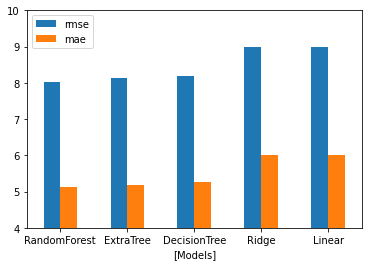

In [12]:
tmp = res[['model', 'rmse', 'mae']]
tmp = tmp.sort_values(by=['rmse']).reset_index(drop='index')
tmp.plot.bar(x='model', rot=0, ylim=[4., 10.0], xlabel='[Models]')

<AxesSubplot:xlabel='[Models]', ylabel='R-Square'>

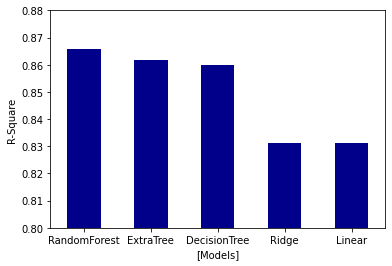

In [13]:
tmp = res[['model', 'r2']]
tmp = tmp.sort_values(by=['r2'], ascending=False).reset_index(drop='index')

tmp.plot.bar(x='model', legend=False, ylabel='R-Square', rot=0, 
             color={"r2": "darkblue"}, ylim=[0.8, 0.88], xlabel='[Models]')

<AxesSubplot:xlabel='model', ylabel='Training Time'>

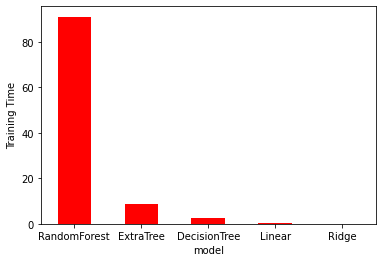

In [14]:
tmp = res[['model', 'fit_time']]
tmp = tmp.sort_values(by=['fit_time'], ascending=False).reset_index(drop='index')

tmp.plot.bar(x='model', color={"fit_time": "red"}, ylabel='Training Time', legend=False, rot=0)

<AxesSubplot:xlabel='model', ylabel='Scoring Time'>

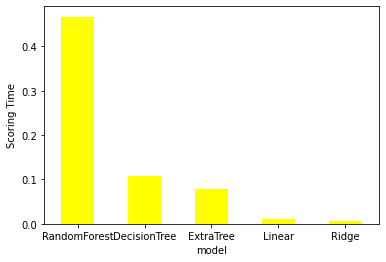

In [15]:
tmp = res[['model', 'score_time']]
tmp = tmp.sort_values(by=['score_time'], ascending=False).reset_index(drop='index')

tmp.plot.bar(x='model', color={"score_time": "yellow"}, ylabel='Scoring Time', legend=False, rot=0)